# Una nueva mirada a la clásica regresión lineal
*Miguel Eduardo Robayo Torres*
<p style="text-align: justify;">
    El humano se ha caracterizado por ser un animal que intenta comprender el mundo en el que vivimos. En un principio se daba como argumento a ciertos fenómenos razones divinas, simples caprichos de algún ser superior. Sin embargo, con el paso del tiempo la curiosidad de la humanidad no permitió conformarse con estas explicaciones y quiso encontrar una forma "terrenal" de explicar estos fenómenos, dando origen a los modelos. Unos se ajustaban muy bien (modelos determinísticos), pero otros no son exactos (estocásticos). Los modelos estocásticos buscan encontrar cierto patrón que permita generar una función que intente explicar de la manera más precisa los datos y así poder generar alguna predicción futura a través de los datos del presente. En este intento, se creó un modelo que permitiera ser sencillo y explicara alguna relación entre las variables, es ahí donde nació la regresión lineal que no es más que una ecuación de una recta que busca minimizar el error entre los datos reales y los pronosticados por la recta. Este modelo funciona muy bien (siempre y cuando los datos tengan una relación lineal), razón por la cual se usa en múltiples campos disciplinarios. No obstante, tiene una limitación teórica, y es que si contamos con una enorme cantidad de datos, las pruebas de hipótesis pueden tener problemas. Un problema relativamente grave si se tiene en cuenta que hoy en día contamos con una creciente fuente de datos. Es por esto que muchos matemáticos, estadísticos, ingenieros de sistemas y otras carreras han trabajado de la mano para crear algoritmos más eficientes que permitan trabajar con grandes volúmenes de datos, generando un cambio en la forma de ver la tradicional regresión lineal que se nos fue enseñada. Este ensayo explicará estos nuevos métodos, dando un breve repaso a la clásica regresión lineal.</p>
    
![Forecas](https://forecastingblog.com/wp-content/uploads/2017/07/photodune-4039768-forecast-reality-road-sign-xs.jpg)





## Regresión lineal y los mínimos cuadrados ordinarios

### Historia de la regresión lineal
<p style="text-align: justify;">
    Las primeras nociones de regresión y correlación proviene en gran parte de estudios realizados es biología, biometría y eugenesia, siendo el matemático Adolphe Quetelet uno de los primeros autores interesados en el tema  Algunas notas históricas sobre la correlación y regresión y su uso en el aula. Su aporte se centró en buscar correlaciones entre las medidas anatómicas de una persona a partir de algunas variables como el sexo, la edad, profesión o nivel educativo. A pesar de estos primeros pasos los métodos no trascendían más allá de un análisis descriptivo. Posteriormente, Francis Galton dió otro importante paso al observar una correlación entre el peso las semillas de diferentes generaciones, lo que permitía calcular el peso de las semillas de las generaciones pasadas (aquí es donde nace el término reversión).</p>

<p style="text-align: justify;">
    A pesar de estos avances, tuvimos que esperar los aportes Legendre y Gauss para conocer la regresión lineal usando los mínimos cuadrados ordinarios. Esta técnica consiste en una función que minimiza los errores entre las variables de muestra y las obtenidas por el modelo lineal. Luego de esto, con ayuda de Markov, se establecieron las razones del porqué este método es insesgado y consistente, sin la necesidad de tener una distribución específica para los datos, conocido más popularmente como el teorema de Gauss Markov.</p> Si quieres aprender un poco más de su historia puedes revizar el artículo:.
    
   [Revista números (2012) Algunas notas históricas sobre la correlación y regresión y su uso en el aula](https://core.ac.uk/download/pdf/20343739.pdf)
    
### Mínimos cuadrados ordinarios (MCO)
    
<p style="text-align: justify;">
    Como se mencionó, la regresión lineal busca encontrar un modelo que permita encontrar un valor de una variable a partir de los datos de otras variables. La variable de nuestro interés se le conoce como variable dependiente puesto que su valor estará determinado por otras variables, las cuales llamaremos independientes y se ubicarán a la derecha de la igualdad:</p>
    
$$ y=b + mx $$   
    
<p style="text-align: justify;">
Los mínimos cuadrados ordinarios son una parte escencial de la regresión lineal puesto que es la forma de encontrar los valores de los parámetros (en este caso $m$ y $b$) de tal forma que minimice el error cuadrático entre los valores reales y estimados. Como esta ecuación no es exacta, sumaremos un término adicional, el error $\epsilon$, que representa otras variables, muchas veces imposibles de identificar. También cambiaremos los parámetros $b$ y $m$ por $\beta$:</p>

$$ y= \beta_0 + \beta_1 x_1 + \epsilon $$

<p style="text-align: justify;">
Por supuesto los valores de $\beta$ no los conocemos, por lo que es necesario estimarlos, usualmente mediante los mínimos cuadrados que no es más que una optimización de la sumatoria de los errores al cuadrado. Sin embargo, esta visión clásica ha ido cambiando en el tiempo debido al gran volumen de información y la creciente complejidad para manejar los datos, lo que hacen que los computadores consuman más recursos y tiempo. Por esta razón, se han implementado nuevos métodos más eficientes que miraremos a continuación.</p>

## Planteamiento del Algoritmo



In [265]:
import numpy as np
import pandas as pd
import sklearn as skl
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

<p style="text-align: justify;">
Para realizar el ejemplo vamos a utilizar una base de datos que contiene la información del PIB y acervo de capital de 133 paises, la idea de este ejercicio es encontrar una correlación entre el PIB y el capital, para poder pronosticar cómo influye el capital en el PIB. Para esto cargamos la base de datos que se encuentra en formato .txt y se organiza la información mediante el uso de las librerías Numpy y Pandas</p>

In [266]:
file="E:\Diplomado de inteligencia artificial y aprendizaje profundo\Capital.txt"
data=np.loadtxt(file, delimiter = '\t', skiprows=1, dtype=bytes).astype(str)

data=pd.DataFrame(data)

data.columns=["Pais", "PIB", "Capital"]

Y, X = data["PIB"], data["Capital"]

X= [float(x) for x in X]
Y= [float(y) for y in Y]

X=np.array(X)
Y=np.array(Y)

n = X.shape
p = X.shape 



Una vez tenemos cargada nuestra base de datos vamos a realizar una pequeña gráfica de correlación para ver la conveniencia de un modelo lineal, a la vez que calculamos su correlación:

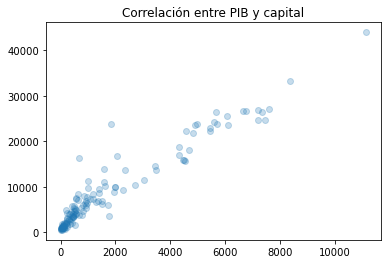

La correlación entre el PIB y el capital es: 0.9568067651073496


In [268]:
def cor(X, Y):
  plt.scatter(X, Y, alpha=0.25)
  plt.title("Correlación entre PIB y capital")
  plt.show()
  return np.corrcoef(X, Y)[0, 1]   #  se recibe uma matriz de correlaciones. Se xtrae la correlación



print("La correlación entre el PIB y el capital es:", cor(X, Y))

Como se observa, los datos parecen tener una correlación lineal, que además es muy alta, así que un modelo lineal puede ser una excelente opción.

<p style="text-align: justify;">
    Hasta ahora no hemos hecho gran cosa, y es en este punto donde se explicarán dos algoritmos para encontrar una ecuación que permita modelar el comportamiento de los datos, en primer lugar usaremos el método clásico y despues emplearemos el algoritmo del descendo del gradiente
    </p>
    
### Estimando con MCO

<p style="text-align: justify;">
Como vimos anteriormente vamos a usar la fórmula clásica de regresión lineal, en este caso haremos una generalización de la optimización de los errores al cuadrado, por lo que usaremos la siguiente notación matricial para simplificar la operación:
</p>

$$ \boldsymbol{\hat{\beta}} = \boldsymbol{(X^TX)^{-1}X^TY} $$ 




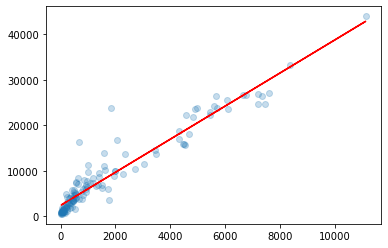

w =  [2363.85844924    3.64107842]
Predicción capital de USD1000 por persona: $ 6004.94
ECM:  6475911.93


In [269]:
def lineal_regression(x, T):
#   W = (Xt*X)^-1 * Xt*Y 
  w = np.linalg.inv(x.T @ x) @ x.T @ Y
  plt.scatter(X, Y, alpha=0.25)
  plt.plot(X, x @ w, color="red")
  plt.show()
  return w, x @ w

def predict(capital, w):
  return (w[0] + w[1] * capital)

def get_mse(yp, y):
  return np.mean(np.square(np.subtract(yp, y)))

w, yp = lineal_regression(np.c_[np.ones(X.shape[0]), X], Y) # np._c concatena a lo largo del segundo eje
print('w = ', w)
print('Predicción capital de USD1000 por persona: $',np.round(predict(1000, w),2))
print('ECM: ',np.round(get_mse(yp, Y),2))

<p style="text-align: justify;">
    De esto modo concluimos que nuestra ecuación estimada es la recta:
    
$$ \hat{Y} = 2363.858 + 3.641 X $$
  </p>

<p style="text-align: justify;">
    Ahora procederemos a realizar la estimación de la recta usando el algoritmo del descenso del gradiente a traves de la librería de numpy
    </p>


In [281]:
num_steps = 200
learningRate = 0.10
criteria = 1e-8
b_0 = 2400
b_1 = 4

Los valores que se obtienen son: nan nan en 199 pasos.


<ipython-input-277-f834c28988fd>:9: RuntimeWarning: overflow encountered in double_scalars
  b_1_gradient -= (2/N) * (Y[i] - (b_0 + b_1 * X[i])) * X[i]
<ipython-input-277-f834c28988fd>:8: RuntimeWarning: overflow encountered in double_scalars
  b_0_gradient -= (2/N) * (Y[i] - (b_0 + b_1 * X[i]))
<ipython-input-277-f834c28988fd>:11: RuntimeWarning: invalid value encountered in double_scalars
  b_0 = b_0 - (learningRate * b_0_gradient)
<ipython-input-277-f834c28988fd>:12: RuntimeWarning: invalid value encountered in double_scalars
  b_1 = b_1 - (learningRate * b_1_gradient)


ValueError: x and y must have same first dimension, but have shapes (133,) and (2,)

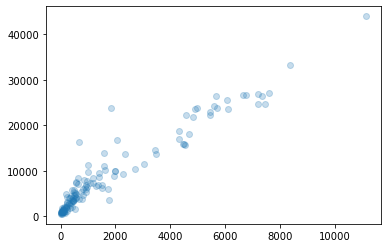

In [277]:
# Proceso iterativo

for step in range(0, num_steps):
    b_0_gradient = 0
    b_1_gradient = 0
    N = float(len(X))
    for i in range(0, len(X)):
        b_0_gradient -= (2/N) * (Y[i] - (b_0 + b_1 * X[i]))
        b_1_gradient -= (2/N) * (Y[i] - (b_0 + b_1 * X[i])) * X[i]
        
    b_0 = b_0 - (learningRate * b_0_gradient)
    b_1 = b_1 - (learningRate * b_1_gradient)
    if max(abs(learningRate * b_0_gradient), abs(learningRate * b_1_gradient)) < criteria:
        break
        
# Impresión de los resultados
print("Los valores que se obtienen son:", b_0, b_1, "en", step, "pasos.")

# gráfica de dispersión
plt.scatter(X, Y, alpha = 0.25)
plt.plot(X, [b_0 + b_1 * 4, b_0 + b_1 * 9], color="red")
plt.show()



In [285]:
b_0_gradient -= (2/N) * (Y[5] - (24000 + 4 * X[5]))


nan

# Conclusiones

<p style="text-align: justify;">
    Al realizar las operaciones con ambos métodos, concluimos que los resultado de los parámetros son similares. La ventaja que tiene el algoritmo del gradiente es que no es necesario invertir la matriz, lo cual exige muchos recursos a la computadora. En este caso no hay gran diferencia puesto que la cantidad de datos usados es muy pequeña pero en el caso de tener grandes datos no queda más opción que utilizar estos algoritmos puesto que son más eficientes y sus resultados son muy buenos.
    </p>